In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ALPHA_VANTAGE_API_KEY = os.environ['AV_API_KEY']

Training progression (hardware selected => cuda:0):


0it [00:00, ?it/s]


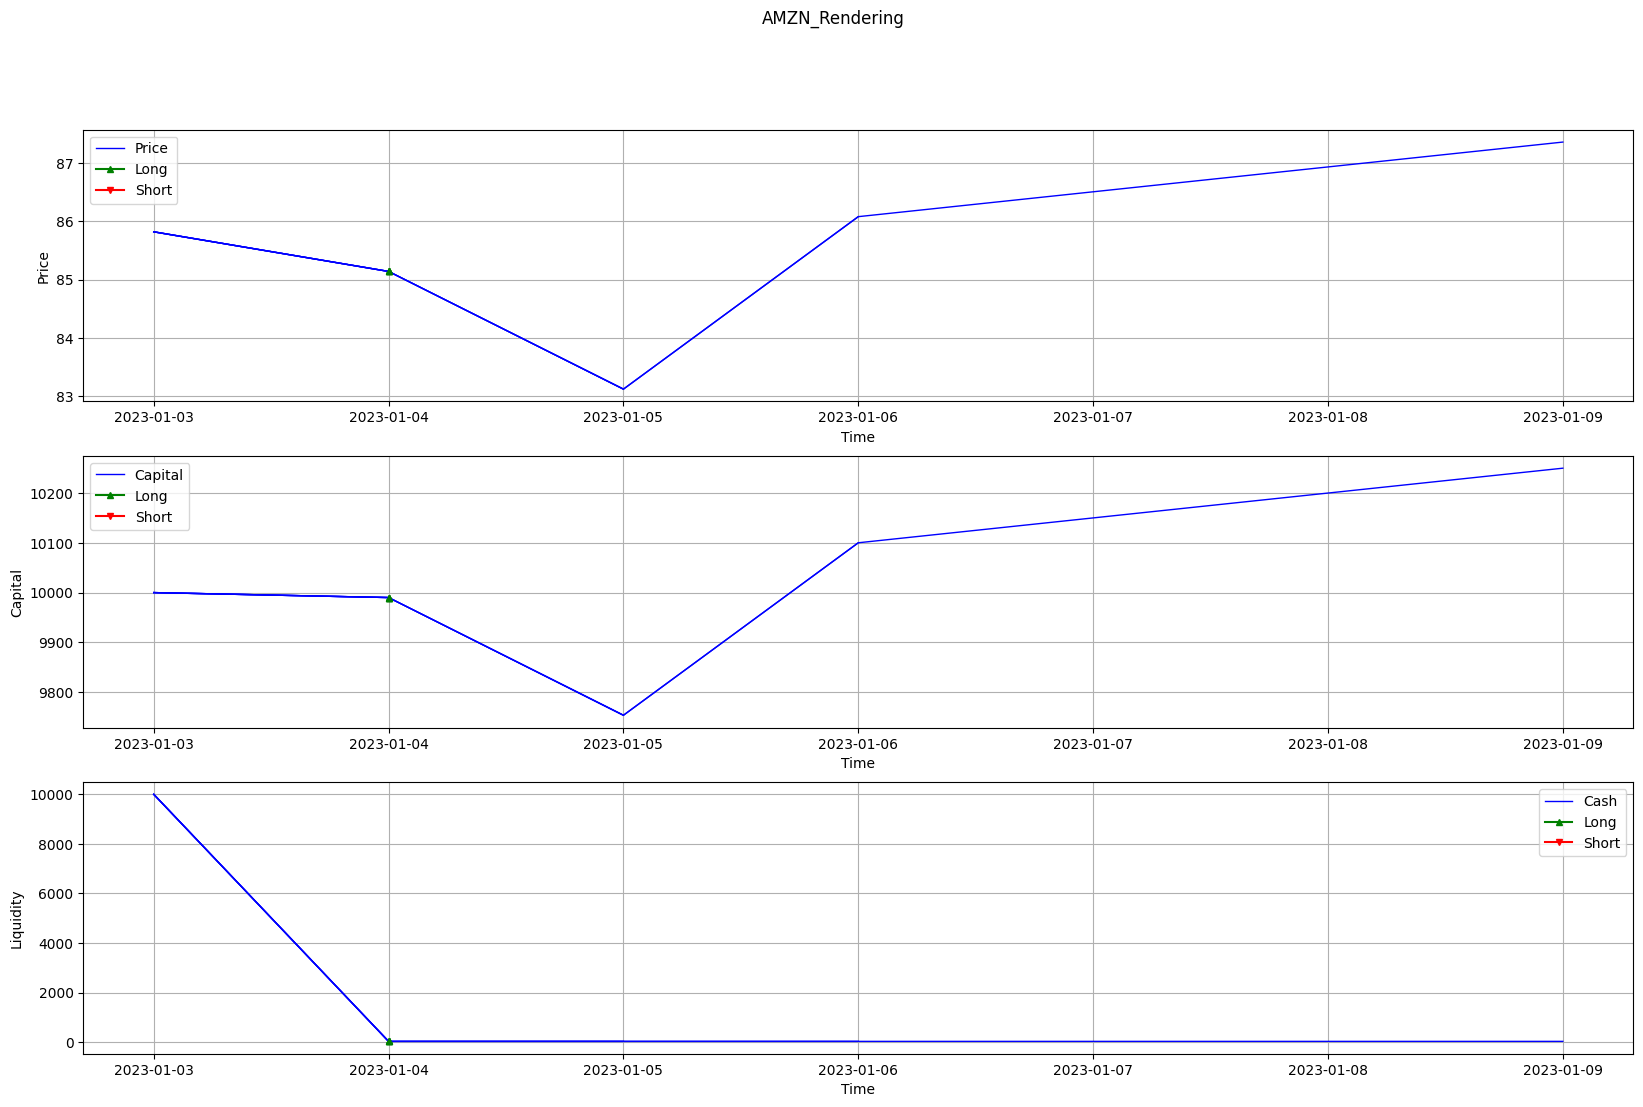

╒═══════════════════════════╤═════════╕
│   Performance Indicator   │  TDQN   │
╞═══════════════════════════╪═════════╡
│    Profit & Loss (P&L)    │  1017   │
├───────────────────────────┼─────────┤
│     Annualized Return     │ 83.23%  │
├───────────────────────────┼─────────┤
│   Annualized Volatility   │ 41.48%  │
├───────────────────────────┼─────────┤
│       Sharpe Ratio        │  1.512  │
├───────────────────────────┼─────────┤
│       Sortino Ratio       │  2.284  │
├───────────────────────────┼─────────┤
│     Maximum Drawdown      │ 18.36%  │
├───────────────────────────┼─────────┤
│ Maximum Drawdown Duration │ 19 days │
├───────────────────────────┼─────────┤
│       Profitability       │ 100.00% │
├───────────────────────────┼─────────┤
│ Ratio Average Profit/Loss │   inf   │
├───────────────────────────┼─────────┤
│         Skewness          │ -0.128  │
╘═══════════════════════════╧═════════╛


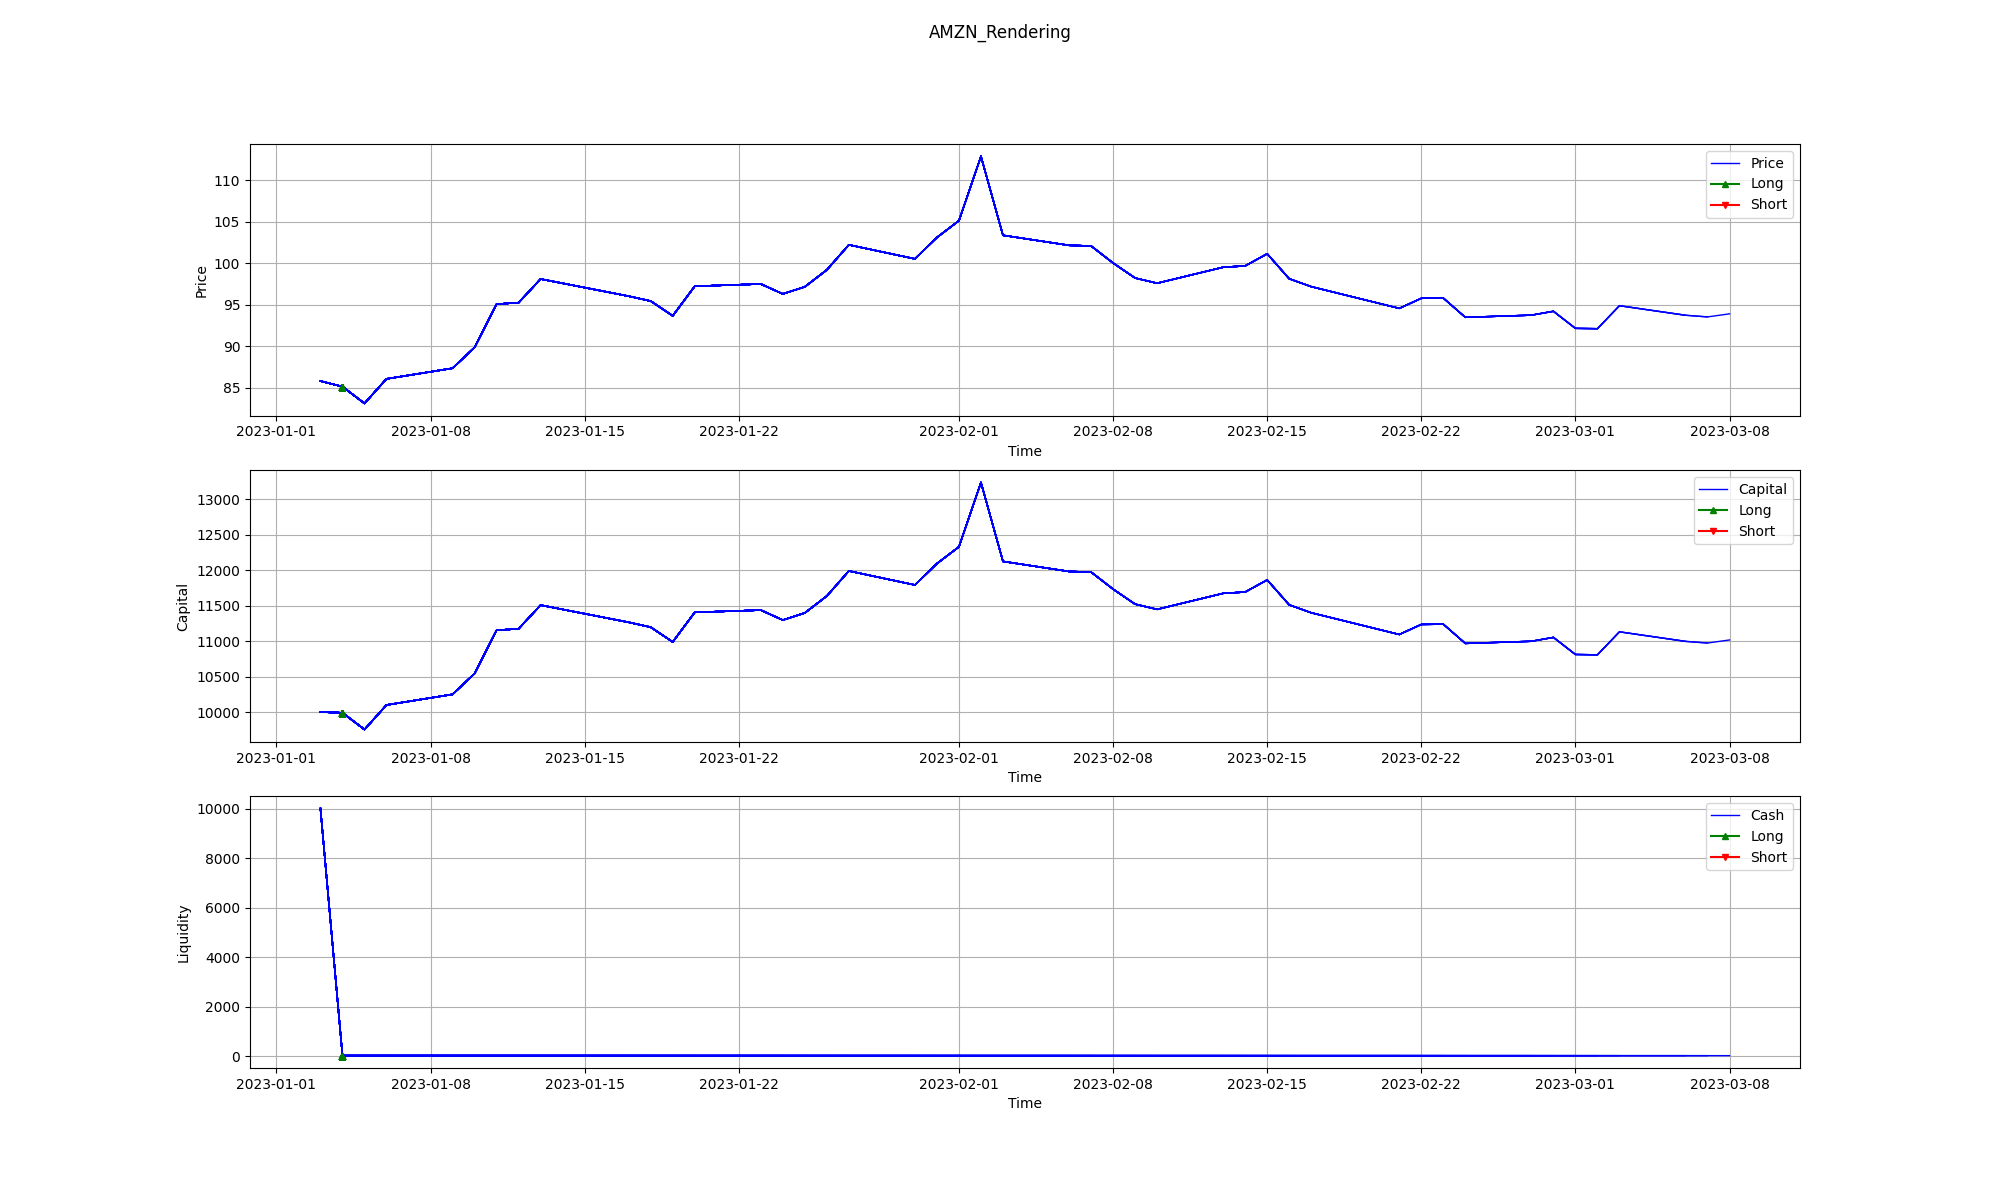

In [2]:
from tradingSimulator import TradingSimulator

# Initialization of the required variables
simulator = TradingSimulator()
strategy = "TDQN"
stock = "AMZN"
startingDate = '2012-1-1'
splitingDate = '2023-1-1'
endingDate = '2023-3-8'
money = 10000

# Training and testing of the trading strategy specified for the stock (market) specified
tradingStrategy, trainingEnv, testingEnv = simulator.simulateStrategy(strategy, 
                                                                      stock, 
                                                                      startingDate=startingDate, 
                                                                      endingDate=endingDate, 
                                                                      splitingDate=splitingDate, 
                                                                      money=money,
                                                                      numberOfEpisodes=0,
                                                                      stateLength=1,
                                                                      interactiveTest=True,
                                                                      showTestPerformance=True,
                                                                      testOnLiveData=False)

In [ ]:
import matplotlib.pyplot as plt
import time
fig = plt.figure()

hfig = display(fig, display_id=True)


def update():
    for i in range(5):
        print(i)
        x = list(range(i + 2))
        xx = [x**2 for x in x]
        plt.clf()
        plt.plot(x, xx)
        fig.canvas.draw()
        hfig.update(fig)
        time.sleep(1)

update()

plt.close(fig)

In [ ]:
# Initialize the TimeSeries class with key and output format 
"""ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 
 
# Get json object with the intraday data and information of the data 
intraday_data, data_info = ts.get_intraday('AMZN', outputsize='full', interval='1min') 

display(intraday_data.head())
intraday_data = intraday_data.drop(["5. volume"], axis=1)
intraday_data.plot()
plt.title('Intraday Times Series for the AMZN stock (1 min)')
plt.grid()
plt.show()"""

In [ ]:
print("hi")